In [67]:
import numpy as np
import control.matlab as m
import matplotlib.pyplot as plt

from pathlib import Path

IMAGES = Path('images')

# Questão 1

G(s) = 
    35
----------
13.5 s + 1



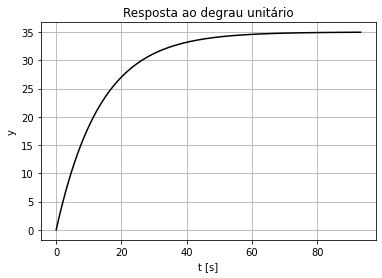

In [68]:
# Dados fornecidos
TD = 0 
T1 = 13.5
K  = 35

# Planta Contínua 
Gs = m.tf(K, [T1, 1])
print(f'G(s) = {Gs}')
 
y, t = m.step(Gs)
plt.plot(t,y, 'k')

plt.xlabel('t [s]')
plt.ylabel('y')
plt.title('Resposta ao degrau unitário')

plt.grid()
if not Path(IMAGES, 'step_response.png').exists():
    plt.savefig(f'{IMAGES}/step_response.png', dpi=720, format = 'png')
plt.show()

Ts < 0.772 s
Ts = 0.925966304207168 -> Tam. de t = 10
Ts = 0.7716385868393066 -> Tam. de t = 12
Ts = 0.5401470107875146 -> Tam. de t = 18


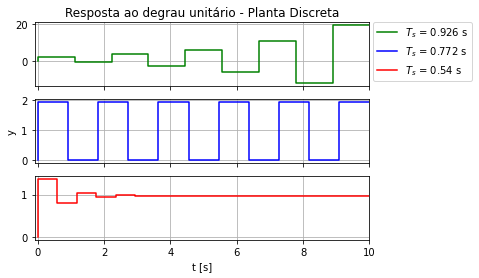

In [151]:
# Planta Discreta
from matplotlib.pyplot import axes


a  = 1/13.5
Ts = -np.log((K-1)/(K+1))/a
print(f'Ts < {round(Ts,3)} s')

Tsvet = [1.2*Ts,Ts, 0.2*Ts]
color = ['g','b','r']

fig, axes = plt.subplots(len(Tsvet),1)
for i, ax in enumerate(axes):
    z = m.tf('z')
    Gz = K*(1 - np.exp(-a*Tsvet[i]))/(z - np.exp(-a*Tsvet[i]))
    Gzmf = m.feedback(Gz, 1)
    
    tfinal = 10
    qteT = int(tfinal/Tsvet[i])
    T = np.linspace(0,tfinal,qteT) 
    y, t = m.step(Gzmf, T)
    print(f'Ts = {Tsvet[i]} -> Tam. de t = {len(t)}')
    ax.step(t,y,color[i],label = f'$T_s$ = {round(Tsvet[i],3)} s')
    ax.set_xlim([-.1,tfinal])
    if i==0: 
        ax.set_title('Resposta ao degrau unitário - Planta Discreta')
    if not i==len(axes)-1: 
        ax.set_xticklabels([])
    ax.grid()

axes[-1].set_xlabel('t [s]')
axes[1].set_ylabel('y')
fig.legend(bbox_to_anchor = (1.15, 0.9))
if not Path(IMAGES, 'step_response_discrete.png').exists():
    fig.savefig(f'{IMAGES}/step_response_discrete.png', dpi=720, format = 'png', bbox_inches = 'tight')
